### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Raw_Recordings"
csv_path = "/Users/ecem/Desktop/csv of scgs"

In [4]:
ms_as = np.load(dir_path + "/MS-AS-10sec.npy", allow_pickle= True)
ms_mr = np.load(dir_path + "/MS-MR-10sec.npy", allow_pickle= True)

mr_as = np.load(dir_path + "/MR-AS-10sec.npy", allow_pickle= True)
mr_ar = np.load(dir_path + "/MR-AR-10sec.npy", allow_pickle= True)

ar_as = np.load(dir_path + "/AR-AS-10sec.npy", allow_pickle= True)

In [5]:
ms_as.shape

(3, 82, 2560)

#### preview of some signal pieces

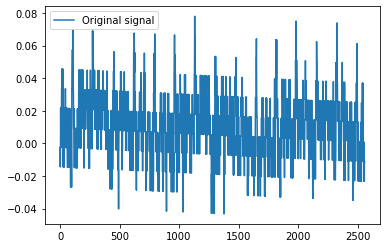

In [6]:
plt.plot(ms_as[0][0])
plt.legend(['Original signal'])

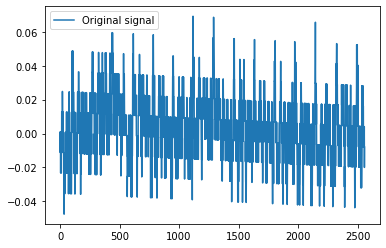

In [7]:
plt.plot(ms_as[0][1])
plt.legend(['Original signal'])

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

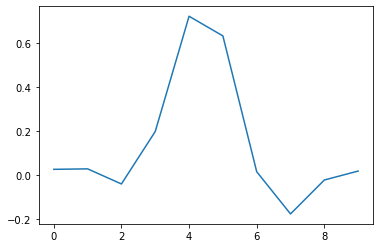

In [8]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(ms_as[0][0], w, level=6)

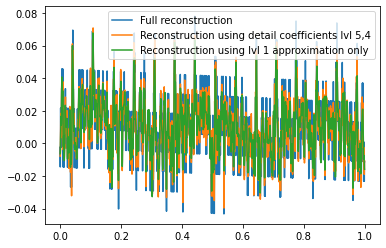

In [9]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

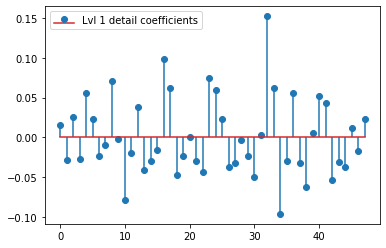

In [10]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

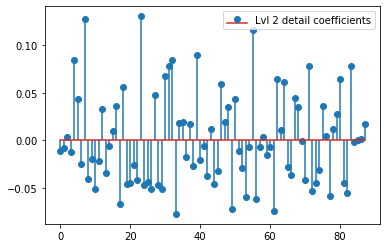

In [11]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


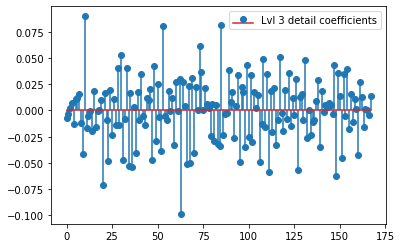

In [12]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


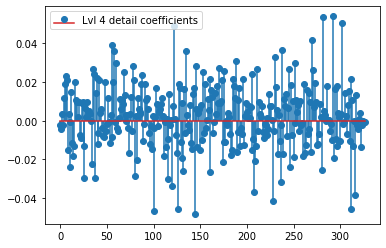

In [13]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


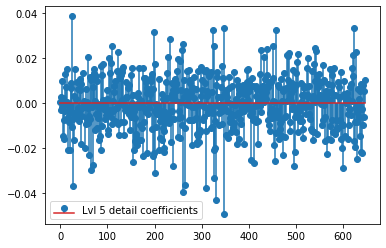

In [14]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


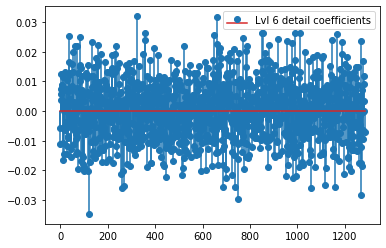

In [15]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [16]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(ms_as[0][0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = ms_as[0][0] - approx_lvl1_interp

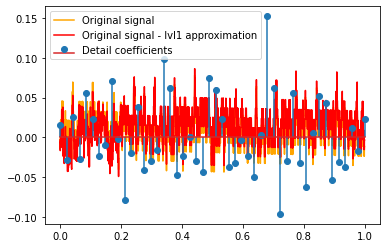

In [17]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(ms_as[0][0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

### Now let's get coef for all pieces

In [18]:
coef_ms_as_x, coef_ms_as_y, coef_ms_as_z = [], [], []
for i in range(len(ms_as[0])):
    coef_ms_as_x.append(pywt.wavedec(ms_as[0][i], w, level=6))
    coef_ms_as_y.append(pywt.wavedec(ms_as[1][i], w, level=6))
    coef_ms_as_z.append(pywt.wavedec(ms_as[2][i], w, level=6))

In [19]:
coef_ms_mr_x, coef_ms_mr_y, coef_ms_mr_z = [], [], []
for i in range(len(ms_mr[0])):
    coef_ms_mr_x.append(pywt.wavedec(ms_mr[0][i], w, level=6))
    coef_ms_mr_y.append(pywt.wavedec(ms_mr[1][i], w, level=6))
    coef_ms_mr_z.append(pywt.wavedec(ms_mr[2][i], w, level=6))

In [20]:
coef_mr_as_x, coef_mr_as_y, coef_mr_as_z = [], [], []
for i in range(len(mr_as[0])):
    coef_mr_as_x.append(pywt.wavedec(mr_as[0][i], w, level=6))
    coef_mr_as_y.append(pywt.wavedec(mr_as[1][i], w, level=6))
    coef_mr_as_z.append(pywt.wavedec(mr_as[2][i], w, level=6))

In [21]:
coef_mr_ar_x, coef_mr_ar_y, coef_mr_ar_z = [], [], []
for i in range(len(mr_ar[0])):
    coef_mr_ar_x.append(pywt.wavedec(mr_ar[0][i], w, level=6))
    coef_mr_ar_y.append(pywt.wavedec(mr_ar[1][i], w, level=6))
    coef_mr_ar_z.append(pywt.wavedec(mr_ar[2][i], w, level=6))

In [22]:
coef_ar_as_x, coef_ar_as_y, coef_ar_as_z = [], [], []
for i in range(len(ar_as[0])):
    coef_ar_as_x.append(pywt.wavedec(ar_as[0][i], w, level=6))
    coef_ar_as_y.append(pywt.wavedec(ar_as[1][i], w, level=6))
    coef_ar_as_z.append(pywt.wavedec(ar_as[2][i], w, level=6))

In [23]:
import pandas as pd

In [24]:
ms_as = np.stack((coef_ms_as_x, coef_ms_as_y, coef_ms_as_z), axis = 0)
ms_mr = np.stack((coef_ms_mr_x, coef_ms_mr_y, coef_ms_mr_z), axis = 0)

mr_as = np.stack((coef_mr_as_x, coef_mr_as_y, coef_mr_as_z), axis = 0)
mr_ar = np.stack((coef_mr_ar_x, coef_mr_ar_y, coef_mr_ar_z), axis = 0)

ar_as = np.stack((coef_ar_as_x, coef_ar_as_y, coef_ar_as_z), axis = 0)


In [25]:
ms_as.shape

(3, 82, 7)

### Level by level

In [26]:
def level_coef_extractor_3d(array, lvl = 0):
    
    lenn = array[0][0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0], array.shape[1], lenn)) #219,48
    
    for i in range(array.shape[1]):
        coef[0,i,:] = array[0][i][lvl]
        coef[1,i,:] = array[1][i][lvl]
        coef[2,i,:] = array[2][i][lvl]
        
    return coef

In [27]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [28]:
saver(ms_as, 0, dir_path, 'ms_as')
saver(ms_mr, 0, dir_path, 'ms_mr')
saver(mr_as, 0, dir_path, 'mr_as')
saver(mr_ar, 0, dir_path, 'mr_ar')
saver(ar_as, 0, dir_path, 'ar_as')

### Check whether each data saved correctly

In [29]:
def column_namer(level = 0, lenght = 48):
    x, y, z = [], [], []
    for i in range(lenght):
        x.append("lvl{0}_x{1}".format(level, i))
        y.append("lvl{0}_y{1}".format(level, i))
        z.append("lvl{0}_z{1}".format(level, i))
    
    return x + y + z

In [30]:
import pandas as pd

In [31]:
def dataframe_checker(path,  disease1 = "None", disease2 = "None", df = pd.DataFrame(), level = 0):

    values, dis  = [], [] 
    dis.append(disease1)
    dis.append(disease2)
    array = np.load(path + "/" + disease1 + "_" + disease2  + "_lvl_{}.npy".format(level), allow_pickle = True)
    columns = column_namer(level = level, lenght = array.shape[2])
    
    for i in range(array.shape[1]):
        values.append(array[0][i].tolist()+ array[1][i].tolist()+ array[2][i].tolist() + dis) 

        medium = pd.DataFrame([values[i]], columns = columns + ["disease1"] + ["disease2"])
        
        df = pd.concat([df, medium], axis = 0)
        
    
    return df

In [32]:
df = dataframe_checker(dir_path, 'MR', 'AS',  level = 0 )

In [33]:
df = dataframe_checker(dir_path, 'MR', 'AR', df, level =0 )
df

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease1,disease2
0,-0.244702,-0.236068,-0.226322,-0.194488,-0.021728,0.029453,0.076783,0.110819,0.253816,0.116260,...,0.010666,-0.087143,-0.172555,-0.472396,-0.585956,-0.577650,-0.562170,-0.538005,MR,AS
0,0.254884,0.273069,0.271307,0.247969,0.263392,0.120253,0.045193,-0.057686,-0.051953,-0.003762,...,0.261038,0.090609,0.168627,0.161888,0.159050,0.169480,0.165709,0.155272,MR,AS
0,0.190560,0.230630,0.213007,0.147370,0.069320,0.135292,0.166964,0.162940,0.022627,-0.118658,...,-0.121939,-0.051587,0.124038,0.386740,0.678771,0.602299,0.594137,0.596925,MR,AS
0,0.167240,0.180006,0.173210,0.135965,0.063945,0.032931,0.065671,-0.073614,-0.033845,-0.015386,...,-0.187332,-0.055976,-0.042115,-0.375645,-0.795290,-0.696282,-0.680003,-0.685836,MR,AS
0,-0.115657,-0.116028,-0.118900,-0.146683,-0.236584,-0.242813,-0.284676,-0.106079,-0.087932,-0.004055,...,-0.042946,-0.150146,-0.100953,-0.483662,-0.930633,-0.829468,-0.808126,-0.813778,MR,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.774495,-0.789550,-0.796134,-0.827439,-1.012739,-1.161753,-1.134039,-0.720740,-1.355683,-1.575045,...,-0.100485,-0.230036,-0.250374,-0.163881,-0.097287,-0.116165,-0.117307,-0.117462,MR,AR
0,-1.386741,-1.413283,-1.389915,-1.283054,-0.998984,-0.643404,-0.410464,-0.406643,-0.616929,-1.164769,...,-0.398616,-0.280851,-0.195192,-0.057950,0.007251,-0.010906,-0.014802,-0.014891,MR,AR
0,-0.813910,-0.794283,-0.788709,-0.780282,-0.649602,-0.682176,-1.045446,-1.340824,-1.349818,-1.493830,...,-0.395999,-0.293976,-0.187579,-0.147932,-0.162111,-0.163133,-0.161969,-0.162154,MR,AR
0,-0.836661,-0.826704,-0.833744,-0.877171,-0.981413,-1.432162,-1.454033,-1.470760,-1.525132,-1.555868,...,-0.401712,-0.298197,-0.186181,-0.043794,-0.015085,-0.031516,-0.031322,-0.030018,MR,AR


In [34]:
df = dataframe_checker(dir_path, 'AR','AS', df, level =0 )

In [35]:
df = dataframe_checker(dir_path, 'MS', 'AS', df, level =0 )

In [36]:
df = dataframe_checker(dir_path, 'MS', 'MR', df, level =0 )

In [37]:
df

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease1,disease2
0,-0.244702,-0.236068,-0.226322,-0.194488,-0.021728,0.029453,0.076783,0.110819,0.253816,0.116260,...,0.010666,-0.087143,-0.172555,-0.472396,-0.585956,-0.577650,-0.562170,-0.538005,MR,AS
0,0.254884,0.273069,0.271307,0.247969,0.263392,0.120253,0.045193,-0.057686,-0.051953,-0.003762,...,0.261038,0.090609,0.168627,0.161888,0.159050,0.169480,0.165709,0.155272,MR,AS
0,0.190560,0.230630,0.213007,0.147370,0.069320,0.135292,0.166964,0.162940,0.022627,-0.118658,...,-0.121939,-0.051587,0.124038,0.386740,0.678771,0.602299,0.594137,0.596925,MR,AS
0,0.167240,0.180006,0.173210,0.135965,0.063945,0.032931,0.065671,-0.073614,-0.033845,-0.015386,...,-0.187332,-0.055976,-0.042115,-0.375645,-0.795290,-0.696282,-0.680003,-0.685836,MR,AS
0,-0.115657,-0.116028,-0.118900,-0.146683,-0.236584,-0.242813,-0.284676,-0.106079,-0.087932,-0.004055,...,-0.042946,-0.150146,-0.100953,-0.483662,-0.930633,-0.829468,-0.808126,-0.813778,MR,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.063624,-0.116311,-0.095682,0.029851,0.216770,0.126891,0.103904,0.139855,0.203691,0.152053,...,0.233832,0.234985,0.206102,0.321739,0.457542,0.426776,0.419729,0.422670,MS,MR
0,0.160955,0.127541,0.132432,0.181104,0.173737,0.177821,0.173468,0.133190,0.180795,0.164669,...,0.318309,0.295681,0.236308,0.416363,0.451829,0.419878,0.425588,0.435717,MS,MR
0,-0.183802,-0.172011,-0.168269,-0.157887,-0.052772,-0.094302,-0.033630,0.007438,0.066805,0.117408,...,0.301542,0.311884,0.280720,0.375058,0.455851,0.437128,0.431987,0.435814,MS,MR
0,0.201973,0.211014,0.219511,0.263884,0.466177,0.447585,0.487150,0.465016,0.473533,0.388000,...,0.164761,0.182359,0.146212,0.126061,0.110647,0.105291,0.109743,0.116828,MS,MR


In [38]:
df.to_csv(csv_path + '/multiple-disease-wavelet-lvl0-coef.csv')